In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

import warnings
warnings.filterwarnings("ignore")

<h2>1. Работа с первым типом файлов </h2>

<h3>1.1 Объединение всех excel файлов в один большой csv </h3>

In [2]:
l = []
years = [17,18,19,20,21,22]
months = [i for i in range(1,13)]
for year in years:
    for month in months:
        l.append(f'./files/{month}{year}.xls')

df = pd.read_excel('./files/117.xls')
for i in range(1,len(l)):
    df1 = pd.read_excel(l[i])
    df = pd.concat([df,df1])

<p> Далее я буду скрывать некоторые кондифенциальные данные </p>

In [3]:
headers = ['Дата рождения пациента', 'Код лабораторного исследования', 'Наименование лабораторного исследования', 'Результат лабораторного исследования', 'Дата и время лабораторного исследования', 'Референсные значения', 'Дата назначения']
df[headers].head()

,Дата рождения пациента,Код лабораторного исследования,Наименование лабораторного исследования,Результат лабораторного исследования,Дата и время лабораторного исследования,Референсные значения,Дата назначения
0,17.12.1964,БХ0005,Аланинаминотрансфераза,"10,7",13.01.2017 13:29,0 - 31,11.01.2017 12:19
1,17.12.1964,БХ0005,Аланинаминотрансфераза,"8,7",23.01.2017 14:32,0 - 31,20.01.2017 12:27
2,17.12.1964,БХ0005,Аланинаминотрансфераза,6.9,01.02.2017 14:47,0 - 31,30.01.2017 14:20
3,17.12.1964,БХ0005,Аланинаминотрансфераза,"6,9",01.02.2017 14:47,0 - 31,30.01.2017 14:20
4,17.12.1964,БХ0010,Аспартатаминотрансфераза,"9,4",23.01.2017 14:32,0 - 31,20.01.2017 12:27


<h3>1.2 Работа с данными</h3>

<p> В 2020 и в последующих годах были изменения в названии лабораторного исследовании </p>

In [4]:
df[df['Наименование лабораторного исследования'] == 'Глюкоза (GLUC)']['Наименование лабораторного исследования'] = 'Глюкоза'
df[df['Наименование лабораторного исследования'] == 'Общий белок (TP)']['Наименование лабораторного исследования'] = 'Общий белок'
df[df['Наименование лабораторного исследования'] == 'Билирубин общий (TBIL)']['Наименование лабораторного исследования'] = 'Билирубин общий'
df[df['Наименование лабораторного исследования'] == 'Амилаза (AMYL)']['Наименование лабораторного исследования'] = 'Амилаза'
df[df['Наименование лабораторного исследования'] == 'Креатинкиназа (CK)']['Наименование лабораторного исследования'] = 'Креатинфосфокиназа'
df[df['Наименование лабораторного исследования'] == 'Креатинфосфокиназа (CK-МВ)']['Наименование лабораторного исследования'] = 'Креатинфосфокиназа- МВ'
df[df['Наименование лабораторного исследования'] == 'Креатинин (CREA)']['Наименование лабораторного исследования'] = 'Креатинин'
df[df['Наименование лабораторного исследования'] == 'Мочевина (UREL)']['Наименование лабораторного исследования'] = 'Мочевина'
df[df['Наименование лабораторного исследования'] == 'С-реактивный белок (CRPN)']['Наименование лабораторного исследования'] = 'С-реактивный белок'
df[df['Наименование лабораторного исследования'] == 'Альбумин (ALB)']['Наименование лабораторного исследования'] = 'Альбумин'
df[df['Наименование лабораторного исследования'] == 'Натрий (Na)']['Наименование лабораторного исследования'] = 'Натрий'
df[df['Наименование лабораторного исследования'] == 'Калий (K)']['Наименование лабораторного исследования'] = 'Калий'
df[df['Наименование лабораторного исследования'] == 'рН']['Наименование лабораторного исследования'] = 'рН (артерия)'
df[df['Наименование лабораторного исследования'] == 'pCO2']['Наименование лабораторного исследования'] = 'pCO2 (артерия)'
df[df['Наименование лабораторного исследования'] == 'HCO3-']['Наименование лабораторного исследования'] = 'HCO3-(артерия)'
df[df['Наименование лабораторного исследования'] == 'BE b']['Наименование лабораторного исследования'] = 'BE b (артерия)'
df[df['Наименование лабораторного исследования'] == 'Na+']['Наименование лабораторного исследования'] = 'Na+ (артерия)'
df[df['Наименование лабораторного исследования'] == 'K+']['Наименование лабораторного исследования'] = 'K+ (артерия)'
df[df['Наименование лабораторного исследования'] == 'Ca+']['Наименование лабораторного исследования'] = 'Ca+ (артерия)'
df[df['Наименование лабораторного исследования'] == 'BE(act)']['Наименование лабораторного исследования'] = 'BE(act) (артерия)'
df[df['Наименование лабораторного исследования'] == 'Осмолярность крови']['Наименование лабораторного исследования'] = 'Осмолярность крови (артерия)'
df[df['Наименование лабораторного исследования'] == 'Cl-']['Наименование лабораторного исследования'] = 'Cl- (артерия)'
df[df['Наименование лабораторного исследования'] == 'Лактат']['Наименование лабораторного исследования'] = 'Лактат (артерия)'
df[df['Наименование лабораторного исследования'] == 'Глюкоза']['Наименование лабораторного исследования'] = 'Глюкоза (артерия)'
df[df['Наименование лабораторного исследования'] == 'FIO2']['Наименование лабораторного исследования'] = 'FIO2 (артерия)'
df[df['Наименование лабораторного исследования'] == 'Гемоглобин (HGB)']['Наименование лабораторного исследования'] = 'Гемоглобин'
df[df['Наименование лабораторного исследования'] == 'Эритроциты (RBC)']['Наименование лабораторного исследования'] = 'Эритроциты'
df[df['Наименование лабораторного исследования'] == 'Лейкоциты (WBC)']['Наименование лабораторного исследования'] = 'Лейкоциты'
df[df['Наименование лабораторного исследования'] == 'Гематокрит (HCT)']['Наименование лабораторного исследования'] = 'Гематокрит'
df[df['Наименование лабораторного исследования'] == 'Незрелые гранулоциты (IG#)']['Наименование лабораторного исследования'] = 'Незрелые гранулоциты'
df[df['Наименование лабораторного исследования'] == 'Тромбоциты (PLT)']['Наименование лабораторного исследования'] = 'Тромбоциты'
df[df['Наименование лабораторного исследования'] == 'СОЭ']['Наименование лабораторного исследования'] = 'Скорость оседания эритроцитов'
df[df['Наименование лабораторного исследования'] == 'АЧТВ']['Наименование лабораторного исследования'] = 'Активированное частичное тромбопластиновое время (АЧТВ)'
df[df['Наименование лабораторного исследования'] == 'МНО']['Наименование лабораторного исследования'] = 'Международное нормализованное отношение'

<p> Необходимы не все лабораторные исследования и не все фичи</p>

In [5]:
headers_important = ['ФИО пациента', 'Дата рождения пациента', 'Наименование лабораторного исследования', 'Результат лабораторного исследования', 'Дата назначения']
#code_lab = 'БХ0005 БХ0010 БХ0015 БХ0025 БХ0030 БХ0035 БХ0040 БХ0045 БХ0050 БХ0055 БХ0065 БХ0125 БХ0130 БХ0160 БХ0165 ГК0001 ГК0005 ГК0031 ГК0036 ГК0086 ГК0091 ГК0096 ГК0111 ГК0161 ГК0166 ГК0180 ГК0185 ГК0190 ГМ0001 ГМ0002 ГМ0012 ГМ0018 ГМ0022 ГМ0029 ГМ0275 ГМ0280 ГМ0014 ГМ0025 ГМ0075 ГМ0085 ГМ0013 ГМ0030 ГМ0028 ГС0002 ГС0005 ГС0031 ГС0060'
name_lab = 'Аланинаминотрансфераза,Аспартатаминотрансфераза,Глюкоза,Общий белок,Общий билирубин,Амилаза,Креатинфосфокиназа,Креатинфосфокиназа- МВ,Креатинин,Мочевина,С-реактивный белок,Альбумин,Натрий,Калий,рН (артерия),pCO2 (артерия),HCO3-(артерия),BE b (артерия),Na+ (артерия),K+ (артерия),Ca+ (артерия),BE(act) (артерия),Осмолярность крови (артерия),Cl- (артерия),Лактат (артерия),Глюкоза (артерия),FIO2 (артерия),Гемоглобин,Эритроциты,Лейкоциты,Нейтрофилы #,Лимфоциты #,Гематокрит,Незрелые гранулоциты,Незрелые гранулоциты,Метамиелоциты(микроскопия),Моноциты #,Эозинофилы #,Базофилы #,Миелоциты(микроскопия),Тромбоциты,Скорость оседания эритроцитов,Протромбиновая активность плазмы по Квику,Активированное частичное тромбопластиновое время (АЧТВ),Протромбиновое время,Международное нормализованное отношение'

#code_lab = code_lab.split(' ')
name_lab = name_lab.split(',')

In [6]:
df = df[headers_important]

In [7]:
df['Дата рождения пациента'] = df['Дата рождения пациента'].apply(lambda x: datetime.strptime(x,'%d.%m.%Y'))
df['Дата назначения'] = df['Дата назначения'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M'))

In [8]:
df = df[df['Наименование лабораторного исследования'].isin(name_lab)]

<p> Нужна не дата рождения, а возраст пациента </p>

In [9]:
df['Дата рождения пациента'] =  df['Дата назначения'].dt.year - df['Дата рождения пациента'].dt.year

<p> Дата рождения высчитывалась для каждого пациента относительно даты назначения, и чтобы исключить ошибки в возрасте с теми пациентами, которым в момент нахождения в больнице исполнился день рождения, выбирается минимальная дата из всех возможных </p>

In [10]:
df = pd.merge(df, 
         df.groupby(by='ФИО пациента', as_index=False)[['ФИО пациента', 'Дата рождения пациента']].min(),
         how='left',
         on=['ФИО пациента'])
df.rename(columns={'Дата рождения пациента_y': 'Дата рождения пациента'}, inplace=True)
df.drop(['Дата рождения пациента_x'], axis=1, inplace=True)

<p> Находится дата первого дня пребывания в больнице </p>

In [11]:
df = df.merge(df.groupby(by='ФИО пациента',as_index=False)['Дата назначения'].min(), how='inner', on='ФИО пациента')

<p> Находится дата анализа относительно первого дня пребывания в больнице </p>

In [12]:
df['Сутки'] = (df['Дата назначения_x'] - df['Дата назначения_y']).dt.days

In [13]:
df.drop(['Дата назначения_x'], inplace=True, axis=1)

In [14]:
df.rename(columns={
    'ФИО пациента': 'ФИО', 
    'Дата рождения пациента': 'Возраст', 
    'Наименование лабораторного исследования': 'Наименование',
    'Результат лабораторного исследования': 'Результат',
    'Дата назначения_y': 'Поступление'}, inplace=True)

In [15]:
df = df[['ФИО', 'Возраст', 'Сутки', 'Поступление', 'Наименование', 'Результат']]

In [16]:
df.iloc[:,1:].head()

,Возраст,Сутки,Поступление,Наименование,Результат
0,53,0,2017-01-11 12:19:00,Аланинаминотрансфераза,"10,7"
1,53,9,2017-01-11 12:19:00,Аланинаминотрансфераза,"8,7"
2,53,19,2017-01-11 12:19:00,Аланинаминотрансфераза,6.9
3,53,19,2017-01-11 12:19:00,Аланинаминотрансфераза,"6,9"
4,53,9,2017-01-11 12:19:00,Аспартатаминотрансфераза,"9,4"


<p> Далее идёт форматирование данных для приведения их к общему виду </p>

In [17]:
def rep1(x):
    arr = ['0','1','2','3','4','5','6','7','8','9']
    for elem in arr:
        if elem in str(x):
            return x
    return '-'
    
    
df['Результат'] = df['Результат'].apply(rep1)
df = df[df['Результат'] != '-']

In [18]:
def rep2(x):
    if type(x) == str:
        x = ''.join(x.split())
        
    arr = ['*', '@', '!', '<', '>', '(', ')', '^', ':', '?', '&', '%', '$', ';', '#', '№','-','_','/','\\']
    for elem in arr:
        x = ''.join(str(x).split(elem))
        
    x = ''.join(i for i in str(x) if not i.isalpha())
    
    if ',' in str(x):
        return float('.'.join(x.split(',')))
    
    #if type(x) == int or type(x) == float:
    #    return float(x)
    
    return float(x)
    

df['Результат'] = df['Результат'].apply(rep2)

<p> Берутся анализы за последние 20 дней <p>

In [19]:
df = df[df['Сутки'] < 20]

In [20]:
days = [i for i in range(20)]
name_columns = []
for day in days:
    for name in name_lab:
        name_columns.append(f'{name}_{day}')

In [21]:
df1 = df.groupby(['ФИО', 'Сутки', 'Наименование'], as_index=False).mean()
df1['Возраст'] = df1['Возраст'].astype(int)

<h3>1.3 Создание итоговой таблицы </h3>

<p> В результате хотелось бы видеть конечную табилцу, которая имеет в себе основные данные в момент поступления пациента по типу: ППО, ПГО, ингаляционная травма и другие, а также столбцы формата {Анализ}_{День пребывания}, то было принято создать пустую таблицу и после этого производить подставление значений </p>

In [22]:
df_result = pd.DataFrame(columns=['ФИО', 'Возраст', 'Поступление'])
df_copy = (df.groupby(['ФИО', 'Возраст', 'Поступление'], as_index=False).count())[['ФИО', 'Возраст', 'Поступление']]

df_result['ФИО'] = df_copy['ФИО']
df_result['Возраст'] = df_copy['Возраст']
df_result['Поступление'] = df_copy['Поступление']
df_result['Этиология'] = np.nan
df_result['Диагноз'] = np.nan
df_result['Площадь поверхностного ожога'] = np.nan
df_result['Площадь глубокого ожога'] = np.nan
df_result['Ингаляционная травма'] = np.nan
df_result['Индекс Франка'] = np.nan
df_result['Индекс тяжести поражения'] = np.nan
df_result['Осложнения'] = np.nan
df_result['Отсрочка'] = np.nan

In [23]:
for day in days:
    for name in name_lab:
        df2 = df1[(df1['Сутки'] == day) & (df1['Наименование'] == name)]
        df2.drop(['Сутки','Поступление'], axis=1, inplace=True)
        df_result = pd.merge(df_result, df2, how='left', on=['ФИО','Возраст'])
        df_result.drop(['Наименование'], axis=1, inplace=True)
        df_result.rename(columns={'Результат': f'{name}_{day}'}, inplace=True)

In [24]:
df_result = df_result.sort_values(by='Поступление')

In [25]:
df_result.iloc[:,1:].head()

,Возраст,Поступление,Этиология,Диагноз,Площадь поверхностного ожога,Площадь глубокого ожога,Ингаляционная травма,Индекс Франка,Индекс тяжести поражения,Осложнения,...,Моноциты #_19,Эозинофилы #_19,Базофилы #_19,Миелоциты(микроскопия)_19,Тромбоциты_19,Скорость оседания эритроцитов_19,Протромбиновая активность плазмы по Квику_19,Активированное частичное тромбопластиновое время (АЧТВ)_19,Протромбиновое время_19,Международное нормализованное отношение_19
191,48,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851,29,2017-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,34,2017-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.25,0.03,0.01,1.0,253.5,55.0,NaN,NaN,NaN,NaN
1239,37,2017-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343,48,2017-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>2. Работа со второй таблицей </h2>

In [26]:
df2017 = pd.read_excel('./files/second_files/2017.xlsx')
df2018 = pd.read_excel('./files/second_files/2018.xls')
df2019 = pd.read_excel('./files/second_files/2019.xlsx')
df2020 = pd.read_excel('./files/second_files/2020.xlsx')
df2021 = pd.read_excel('./files/second_files/2021.xlsx')
df2022 = pd.read_excel('./files/second_files/2022.xlsx')

In [27]:
data = pd.concat([df2017,df2018,df2019,df2020,df2021,df2022])

In [28]:
#data = pd.read_csv('file2.csv', index_col=[0])

In [29]:
data = data.reset_index(drop=True)

In [30]:
data = data[data['возраст'] != 'нет']

In [31]:
data['фио'] = data['фио'].apply(lambda x: x.split()[0])

In [32]:
data.iloc[:,1:].head()

,возраст,год поступления,площадь поверхностного и глубокого ожога,ингаляционная травма,осложнения,отсрочка,диагноз
0,81,2017,пл32/18,ит2,NaN,NaN,смерть
1,44,2017,пл 54/12,ит1,NaN,NaN,выпис
2,33,2017,пл 35/30,NaN,NaN,NaN,выпис
3,47,2017,конт 20/16,NaN,NaN,NaN,выпис
4,36,2017,пища 36/12,NaN,NaN,NaN,выпис


<p> Некоторые данные были в ручную изменены на верные </p>

In [33]:
data.at[65,'площадь поверхностного и глубокого ожога'] = data.at[65,'площадь поверхностного и глубокого ожога']+ '/2'
data.at[110,'площадь поверхностного и глубокого ожога'] = data.at[110,'площадь поверхностного и глубокого ожога']+ '/2'
data.at[209,'площадь поверхностного и глубокого ожога'] = data.at[209,'площадь поверхностного и глубокого ожога']+ '/5'
data.at[210,'площадь поверхностного и глубокого ожога'] = data.at[210,'площадь поверхностного и глубокого ожога']+ '/3'
data.at[303,'площадь поверхностного и глубокого ожога'] = data.at[303,'площадь поверхностного и глубокого ожога']+ '/2'
data.at[310,'площадь поверхностного и глубокого ожога'] = data.at[310,'площадь поверхностного и глубокого ожога']+ '/3'
data.at[327,'площадь поверхностного и глубокого ожога'] = data.at[327,'площадь поверхностного и глубокого ожога']+ '/6'
data.at[329,'площадь поверхностного и глубокого ожога'] = data.at[329,'площадь поверхностного и глубокого ожога']+ '/6'
data.at[330,'площадь поверхностного и глубокого ожога'] = data.at[330,'площадь поверхностного и глубокого ожога']+ '/4'
data.at[340,'площадь поверхностного и глубокого ожога'] = data.at[340,'площадь поверхностного и глубокого ожога']+ '/1'
data.at[347,'площадь поверхностного и глубокого ожога'] = data.at[347,'площадь поверхностного и глубокого ожога']+ '/3'
data.at[368,'площадь поверхностного и глубокого ожога'] = data.at[368,'площадь поверхностного и глубокого ожога']+ '/3'
data.at[372,'площадь поверхностного и глубокого ожога'] = data.at[372,'площадь поверхностного и глубокого ожога']+ '/7'
data.at[387,'площадь поверхностного и глубокого ожога'] = data.at[387,'площадь поверхностного и глубокого ожога']+ '/2'
data.at[388,'площадь поверхностного и глубокого ожога'] = data.at[388,'площадь поверхностного и глубокого ожога']+ '/3'
data.at[445,'площадь поверхностного и глубокого ожога'] = data.at[445,'площадь поверхностного и глубокого ожога']+ '/2'
data.at[550,'площадь поверхностного и глубокого ожога'] = data.at[550,'площадь поверхностного и глубокого ожога']+ '/1'
data.at[673,'площадь поверхностного и глубокого ожога'] = data.at[673,'площадь поверхностного и глубокого ожога']+ '/80'
data.at[596, 'площадь поверхностного и глубокого ожога'] = 'пл30/28'
data.at[430, 'площадь поверхностного и глубокого ожога'] = 'эл+пл18/5'
data.at[430, 'ингаляционная травма'] = 'ит1'

In [34]:
data.drop(index=[88], inplace=True)

<p> Далее приведение данных к общему формату </p>

In [35]:
def second_digit(x):
    if len(x) == 2:
        return int(x[1])
    else:
        return 0
    
    
def etiologia(x):
    if type(x) == str:
        if 'гв и пар' in x or 'гв пар' in x: return 6
        if 'пл'in x or 'эл' in x: return 1
        if 'пар' in x: return 2
        if 'гв' in x: return 3
        if 'пища' in x or 'пищ' in x: return 4
        if 'конт' in x: return 5
        if 'уф' in x: return np.nan
        return 1
    else:
        return x


def index_m(x):
    if type(x) == type(''):
        if len(re.findall(r'\d+', x)) > 0:
            return int(re.findall(r'\d+', x)[0])
    return 0


def func_pov(x):
    if len(x) == 2:
        return int(x[0]) - int(x[1])
    elif len(x) == 1:
        return int(x[0])*1.1
    else:
        return x
    
    
def func_glub(x):
    if len(x) == 2:
        return int(x[1])
    elif len(x) == 1:
        return int(x[0])
    else:
        return x
    

def diag_func(x):
    if x == 'выпит' or x == 'выпичс' or x == 'выпимс':
        return 'выпис'
    return x
    
    
data['ингаляционная травма'] = data['ингаляционная травма'].apply(lambda x: ''.join(x.split(' ')) if type(x) == 'str' else x)
data['цифры'] = data['площадь поверхностного и глубокого ожога'].apply(lambda x: re.findall(r'\d+', x))  
data['Площадь глубокого ожога'] = data['цифры'].apply(func_glub)
data['Площадь поверхностного ожога'] = data['цифры'].apply(func_pov)
data['Индекс Франка'] = 3*data['Площадь глубокого ожога'] + data['Площадь поверхностного ожога']
data['Индекс тяжести поражения'] = (15*data['ингаляционная травма'].apply(index_m) + data['Индекс Франка'])
data['этиология'] = data['площадь поверхностного и глубокого ожога'].apply(etiologia)
data['диагноз'] = data['диагноз'].apply(diag_func)
data.drop(['площадь поверхностного и глубокого ожога', 'цифры'], axis=1, inplace=True)
data = data[data['этиология'].notna()]
data['возраст'] = data['возраст'].apply(lambda x: int(x))
data['этиология'] = data['этиология'].apply(lambda x: int(x))

In [36]:
data.iloc[:,1:].head()

,возраст,год поступления,ингаляционная травма,осложнения,отсрочка,диагноз,Площадь глубокого ожога,Площадь поверхностного ожога,Индекс Франка,Индекс тяжести поражения,этиология
0,81,2017,ит2,NaN,NaN,смерть,18,14,68,98,1
1,44,2017,ит1,NaN,NaN,выпис,12,42,78,93,1
2,33,2017,NaN,NaN,NaN,выпис,30,5,95,95,1
3,47,2017,NaN,NaN,NaN,выпис,16,4,52,52,5
4,36,2017,NaN,NaN,NaN,выпис,12,24,60,60,4


In [37]:
df_result['Год'] = pd.to_datetime(df_result['Поступление']).dt.year

<h2> Внесение результатов в итоговую таблицу </h2>

<p> Так как во второй таблице была лишь фамилия, то присоединить таблицы корректно не получится, было принято решение искать пары совпадений: возраст + фамилия. Также было исследовано, что в таблица может быть несовпадение возраста, поэтому брался некоторый интервал. В итоге удалось максимально уменьшить несовпадения </p>

In [38]:
pairs = []
for i, row in data.iterrows():
    if df_result[((df_result['ФИО'].str.contains(row['фио'])) 
                     & (np.abs(df_result[df_result['ФИО'].str.contains(row['фио'])]['Возраст'] - row['возраст']) < 2)
                     & (df_result[df_result['ФИО'].str.contains(row['фио'])]['Год'] == row['год поступления'])
                    )].shape[0] == 1:
        pairs.append((i,df_result.loc[((df_result['ФИО'].str.contains(row['фио'])) 
                     & (np.abs(df_result[df_result['ФИО'].str.contains(row['фио'])]['Возраст'] - row['возраст']) < 2)
                     & (df_result[df_result['ФИО'].str.contains(row['фио'])]['Год'] == row['год поступления'])
                    )].index[0]))

In [39]:
for pair in pairs:
    df_result.at[pair[1], 'Этиология'] = data.at[pair[0], 'этиология']
    df_result.at[pair[1], 'Диагноз'] = data.at[pair[0], 'диагноз']
    df_result.at[pair[1], 'Площадь поверхностного ожога'] = data.at[pair[0], 'Площадь поверхностного ожога']
    df_result.at[pair[1], 'Площадь глубокого ожога'] = data.at[pair[0], 'Площадь глубокого ожога']
    df_result.at[pair[1], 'Ингаляционная травма'] = data.at[pair[0], 'ингаляционная травма']
    df_result.at[pair[1], 'Индекс Франка'] = data.at[pair[0], 'Индекс Франка']
    df_result.at[pair[1], 'Индекс тяжести поражения'] = data.at[pair[0], 'Индекс тяжести поражения']
    df_result.at[pair[1], 'Осложнения'] = data.at[pair[0], 'осложнения']
    df_result.at[pair[1], 'Отсрочка'] = data.at[pair[0], 'отсрочка']

In [40]:
df_result.drop(['Год'], axis=1, inplace=True)

In [41]:
df_result = df_result[df_result['Этиология'].notna()]

In [42]:
df_result = df_result.reset_index(drop=True)

In [43]:
df_result.rename(columns={'Диагноз':'Исход'}, inplace=True)
df_result.drop(['ФИО'], axis=1, inplace=True)

In [44]:
df_result.head()

,Возраст,Поступление,Этиология,Исход,Площадь поверхностного ожога,Площадь глубокого ожога,Ингаляционная травма,Индекс Франка,Индекс тяжести поражения,Осложнения,...,Моноциты #_19,Эозинофилы #_19,Базофилы #_19,Миелоциты(микроскопия)_19,Тромбоциты_19,Скорость оседания эритроцитов_19,Протромбиновая активность плазмы по Квику_19,Активированное частичное тромбопластиновое время (АЧТВ)_19,Протромбиновое время_19,Международное нормализованное отношение_19
0,48,2017-01-01 01:00:00,1.0,выпис,5.0,16.0,ит3,53.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,2017-01-01 05:00:00,4.0,выпис,0.0,25.0,NaN,75.0,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34,2017-01-01 05:00:00,1.0,выпис,5.0,30.0,NaN,95.0,95.0,NaN,...,1.25,0.03,0.01,1.0,253.5,55.0,NaN,NaN,NaN,NaN
3,37,2017-01-01 05:00:00,4.0,выпис,24.0,12.0,NaN,60.0,60.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,2017-01-01 05:00:00,5.0,выпис,4.0,16.0,NaN,52.0,52.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#df_result['Поступление'] = df_result['Поступление'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [46]:
#df_result.to_excel('output.xlsx')

<p> ручное форматирование некоторых значений </p>

In [47]:
df_result.at[702, 'Ингаляционная травма'] = np.nan
df_result.at[702, 'Осложнения'] = 'чмт'
df_result['Ингаляционная травма'] = df_result['Ингаляционная травма'].apply(lambda x: ''.join(str(x).split()))

<h2> Далее, на представленных данных можно применять статистический анализ </h2>

<h2> Некоторые примеры </h2>

In [48]:
df_result['Ингаляционная травма'].value_counts().reset_index()

,Ингаляционная травма,count
0,nan,450
1,ит2,178
2,ит3,162
3,ит1,135


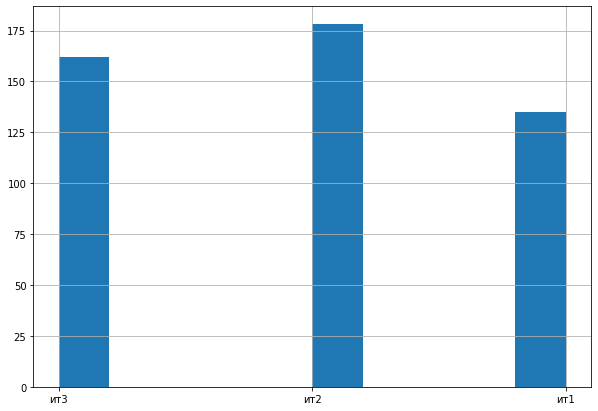

In [49]:
hist1 = df_result['Ингаляционная травма'][df_result['Ингаляционная травма'] != 'nan'].hist()
hist1.figure.set_size_inches(10, 7)

In [50]:
df_result[['Площадь поверхностного ожога', 'Площадь глубокого ожога']].describe()

,Площадь поверхностного ожога,Площадь глубокого ожога
count,925.000000,925.000000
mean,19.770811,16.716757
std,13.031406,18.290637
min,-2.000000,1.000000
25%,10.000000,5.000000
50%,18.000000,10.000000
75%,27.000000,20.000000
max,88.000000,98.000000


In [51]:
df_example = df_result[['Поступление','Исход','Этиология','Индекс Франка','Индекс тяжести поражения']]
df_example['Поступление'] = df_example['Поступление'].apply(lambda x: x.year)
df_example.head()

,Поступление,Исход,Этиология,Индекс Франка,Индекс тяжести поражения
0,2017,выпис,1.0,53.0,98.0
1,2017,выпис,4.0,75.0,75.0
2,2017,выпис,1.0,95.0,95.0
3,2017,выпис,4.0,60.0,60.0
4,2017,выпис,5.0,52.0,52.0


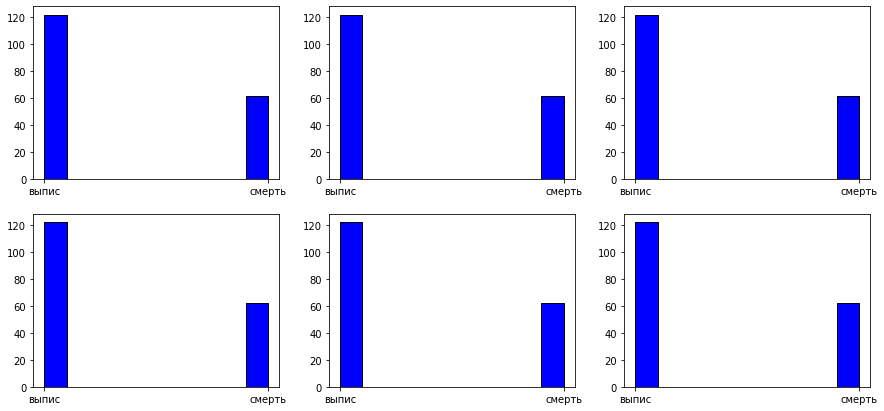

In [52]:
figure, ax = plt.subplots(2,3)
years = [2017,2018,2019,2020,2021,2022]
index = 0
for row in ax:
    for col in row:
        col.hist(df_example[df_example['Поступление'] == 2017]['Исход'], color = 'blue', edgecolor = 'black')
        index = index+1
        col.figure.set_size_inches(15,7)
plt.show()

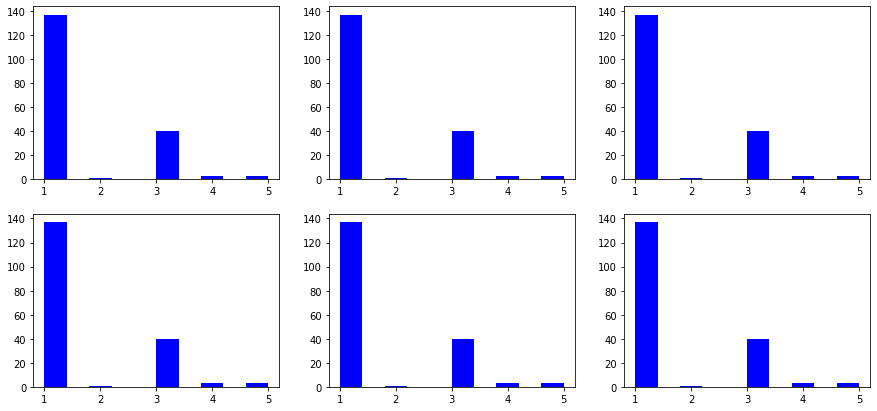

In [53]:
figure, ax = plt.subplots(2,3)
years = [2017,2018,2019,2020,2021,2022]
index = 0
for row in ax:
    for col in row:
        col.hist(df_example[df_example['Поступление'] == 2017]['Этиология'], color = 'blue')
        index = index+1
        col.figure.set_size_inches(15,7)
plt.show()